In [1]:
# Importing essential libraries for data analysis and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load Austin Weather Dataset
data = pd.read_csv('austin_weather.csv')

# Display first few rows
print("Dataset Preview:")
display(data.head())


Dataset Preview:


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [12]:
# Check basic info and missing values
print("Dataset Information:")
data.info()

print("\nMissing Values per Column:")
print(data.isnull().sum())

# Drop unnecessary columns (not useful for prediction)
data.drop(['Events', 'Date', 'SeaLevelPressureInches'], axis=1, inplace=True, errors='ignore')

# Replace 'T' (trace rainfall) and '-' (missing) with 0
data.replace(['T', '-'], 0, inplace=True)

# Convert all columns to numeric (for calculation)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop remaining missing values
data.dropna(inplace=True)

print("\n✅ Data cleaned successfully!")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TempHighF                   1319 non-null   int64  
 1   TempAvgF                    1319 non-null   int64  
 2   TempLowF                    1319 non-null   int64  
 3   DewPointHighF               1319 non-null   int64  
 4   DewPointAvgF                1319 non-null   int64  
 5   DewPointLowF                1319 non-null   int64  
 6   HumidityHighPercent         1319 non-null   int64  
 7   HumidityAvgPercent          1319 non-null   int64  
 8   HumidityLowPercent          1319 non-null   int64  
 9   SeaLevelPressureHighInches  1319 non-null   float64
 10  SeaLevelPressureAvgInches   1319 non-null   float64
 11  SeaLevelPressureLowInches   1319 non-null   float64
 12  VisibilityHighMiles         1319 non-null   int64  
 13  VisibilityAv

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957,61.188779,56.332070,50.663381,87.739196,66.570887,44.890826,30.043715,29.954617,29.863813,9.900682,9.078848,6.777862,13.211524,5.000758,21.308567,0.114397
std,14.766523,14.045904,14.190648,14.268932,15.387522,16.563451,11.548416,12.721695,17.051788,1.446235,1.441037,1.436731,0.962889,1.693019,3.723761,3.461032,2.093961,5.983374,0.428175
min,32.000000,29.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,62.000000,49.000000,52.000000,46.000000,38.000000,85.000000,59.000000,32.000000,29.990000,29.910000,29.820000,10.000000,9.000000,3.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,63.000000,66.000000,61.000000,56.000000,90.000000,67.000000,44.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,92.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,55.000000,30.205000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.000000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


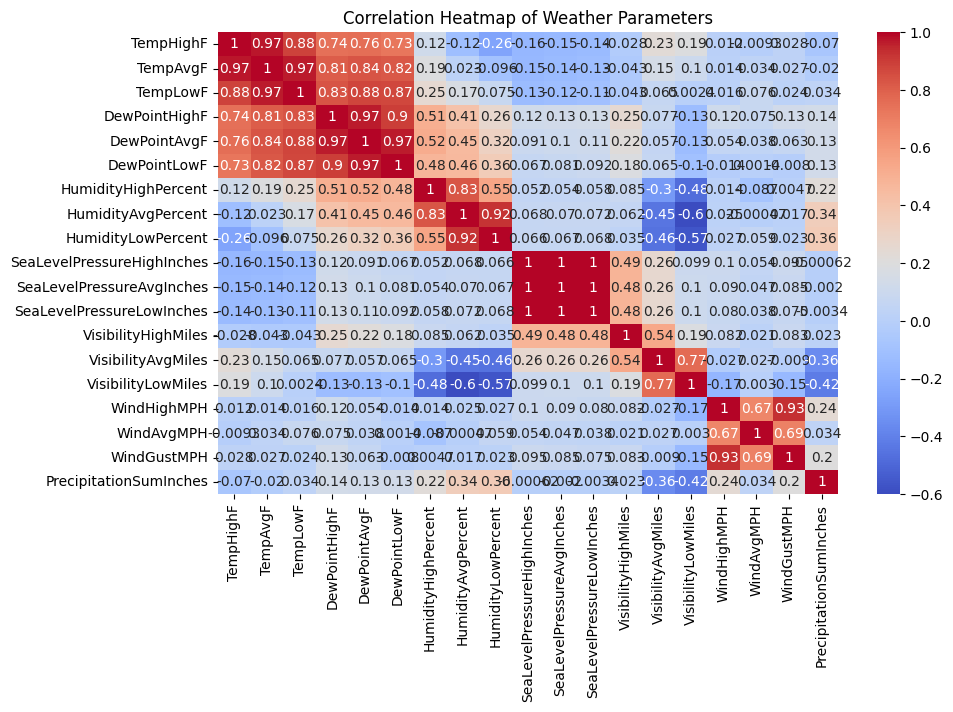

In [13]:
# Display summary statistics
display(data.describe())

# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Weather Parameters")
plt.show()



In [14]:
# Independent variables (X) — Weather features
X = data[['TempAvgF', 'HumidityAvgPercent', 'DewPointAvgF', 'WindAvgMPH', 'VisibilityAvgMiles']]

# Dependent variable (Y) — Rainfall (in inches)
Y = data['PrecipitationSumInches']



In [15]:
# Split dataset into 70% training and 30% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])



Training Samples: 923
Testing Samples: 396


In [7]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 0.49784296641906145
Coefficients: [-0.00560874  0.00392327  0.00609057  0.01041974 -0.07082828]


In [16]:
# Predict rainfall using the test data
Y_pred = model.predict(X_test)

# Create a comparison table for actual vs predicted values
comparison = pd.DataFrame({
    'Actual Rainfall': Y_test,
    'Predicted Rainfall': Y_pred
})

print("Actual vs Predicted Rainfall:")
display(comparison.head())



Actual vs Predicted Rainfall:


,Actual Rainfall,Predicted Rainfall
677,0.00,0.048889
1046,0.33,0.173085
610,0.00,0.032091
49,0.00,0.234524
1284,0.01,0.311762


In [17]:
# Calculate R² and RMSE to check model performance
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")



R² Score: 0.198
RMSE: 0.389


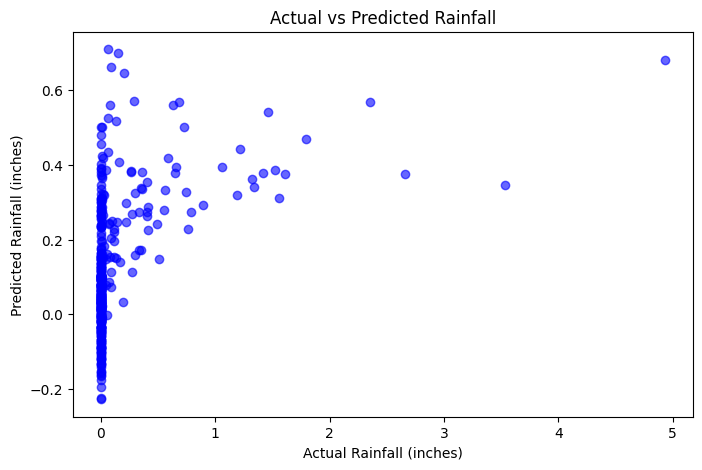

In [18]:
# Plot actual vs predicted rainfall values
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6)
plt.title("Actual vs Predicted Rainfall")
plt.xlabel("Actual Rainfall (inches)")
plt.ylabel("Predicted Rainfall (inches)")
plt.show()



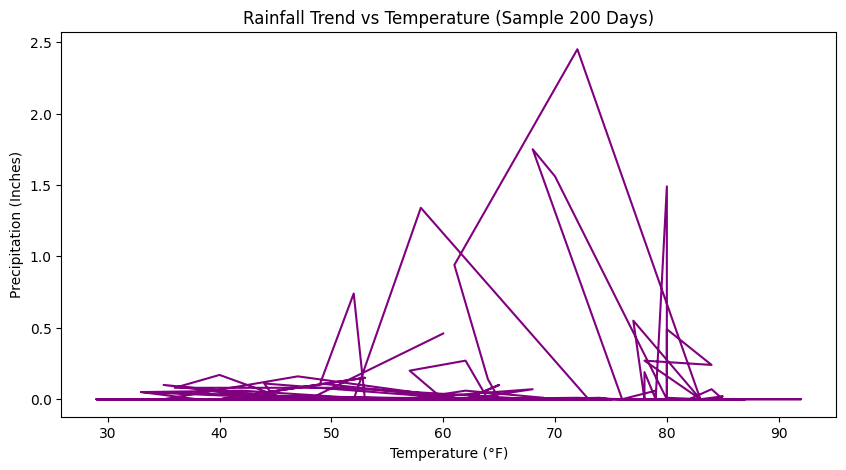

In [11]:
plt.figure(figsize=(10,5))
plt.plot(data['TempAvgF'][:200], data['PrecipitationSumInches'][:200], color='purple')
plt.title("Rainfall Trend vs Temperature (Sample 200 Days)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Precipitation (Inches)")
plt.show()


Output Summary:

Cleaned dataset

Heatmap showing correlations

Linear Regression model results

R², RMSE performance metrics

Visuals: Scatter plot & trend line